<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-diegolarte/blob/main/Curso%20IBM%202/Modulo%205/Modulo5_Notes_IBM_Data_Analysis_A01794028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 5 - Model Evaluation

### Evaluacion del modelo


1. Evaluacion del modelo
2. Overfitting, Underfitting y seleccion del modelo
3. Ridge Regression
4. Grid Search
5. Prediccion y toma de desiciones

Pregunta de negocio:

¿ Como se puede estar seguro de que el modelo trabaja en el mundo real y funciona de manera optima?

### Training/Testing Sets

* Separar los datos entre un set de entrenamiento y un set de prueba
* la mayor parte se asigna al conjunto de entrenamiento
* El conjunto de entrenamiento se usa para construir el modelo y descubrir relaciones predictivas
* El conjunto de prueba se usa para tener una idea de como el modelo va a funcionar en el mundo real


Entrenar un modelo estimador de regresion lineal simple

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [ ]:
df = pd.read_csv(filename)

Definir la variable predictor(X) y la variable objetivo(Y)

In [ ]:
X = df.loc(axis=1)[df.columns != "price"]
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]
Y = df["price"]

Separar la data en conjuntos aleatorios de entrenamiento y prueba

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 4)
(61, 4)
(140,)
(61,)


### Generalizacion

Error de generalizacion es una medida de que tan bien el modelo trabaja prediciendo data nunca antes vista:
* El error que obtenemos usando nuestra data de prueba es una aproximacion de este error

### Cross validation

* Es la metrica mas comun de evaluacion fuera de muestra
* Es una estrategia mas efectiva de usar los datos ya que cada observacon es usada tanto para entrenamiento y prueba

In [ ]:
#Crear un objeto estimador de regresion lineal
lr = LinearRegression()

In [ ]:
scores = cross_val_score(lr,x_train,y_train,cv=3)


In [ ]:
scores

array([0.83796883, 0.74905543, 0.76091441])

Funcion cross_val_predict()
* retorna la prediccion que fue obtenida por cada elemento cuando estaba en el conjunto de prueba

In [ ]:
yhat = cross_val_predict(lr,x_train,y_train,cv=3)


### Overfitting, Underfitting y seleccion del modelo

Entrenar el modelo con diferentes ordenes polinomiales para ver cual se ajusta mejor a los datos calculando R2

In [ ]:
order = [1,2,3,4]
Rsqu_test = []
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

In [ ]:
#Visualizar cual iteracion se ajusto a un mejor resultado del R2
Rsqu_test

[0.6958976563016213,
 0.6970750162486514,
 0.7038601610036697,
 0.7047465788514722]

### Ridge Regression

* Este metodo ayuda a controlar el overfitting
* Cuando se tienen polinomios de ordenes muy grandes, ayuda a reducir la magnitud de estos por medio de un parametro llamado alpha
* Para seleccionar el mejor alpha, se usa cross validation

In [ ]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)

yhat = RidgeModel.predict(x_train)


### Grid Search

* sklearn tiene una estrategia para iterar automaticamente sobre los hiperparametros del modelo usando cross-validation, esto se llama grid search

In [ ]:
parameters1 = [
    {'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}
]

RR = Ridge()

Grid1 = GridSearchCV(RR,parameters1,cv=4) #El metodo por defecto de scoring es R2

Grid1.fit(x_train,y_train)



GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Obtener mejor estimador con el mejor parametro alpha encontrado

In [ ]:
Grid1.best_estimator_


Ridge(alpha=10000)

Obtener scores de cada una de las iteraciones de alpha

In [ ]:
scores = Grid1.cv_results_

scores['mean_test_score']

array([0.78948114, 0.78948134, 0.7894831 , 0.78950062, 0.78966216,
       0.79060737, 0.79251935, 0.78021059, 0.75876238])

Incluir Mas hyperparametros al grid search

In [ ]:
parameters1 = [
    {'alpha':[1,10,100,1000],
     'normalize': [True,False]
    }
]

RR = Ridge()

Grid1 = GridSearchCV(RR,parameters1,cv=4) #El metodo por defecto de scoring es R2

Grid1.fit(x_train,y_train)

c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\Diego Olarte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [1, 10, 100, 1000],
                          'normalize': [True, False]}])

Obtener mejor estimador con los mejores parametro alpha y normalize encontrados

In [ ]:
Grid1.best_estimator_

Ridge(alpha=1000, normalize=False)

Obtener scores de cada una de las iteraciones de alpha y normalize

In [ ]:
scores = Grid1.cv_results_

scores['mean_test_score']

array([0.73815158, 0.7894831 , 0.34115443, 0.78950062, 0.0464581 ,
       0.78966216, 0.001374  , 0.79060737])

In [ ]:
scores.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_normalize', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
for param,mean_test in zip(scores['params'],scores['mean_test_score']):
    print(param,"R2 on test data:", mean_test)

{'alpha': 1, 'normalize': True} R2 on test data: 0.7381515766777202
{'alpha': 1, 'normalize': False} R2 on test data: 0.7894831040747067
{'alpha': 10, 'normalize': True} R2 on test data: 0.34115443257661704
{'alpha': 10, 'normalize': False} R2 on test data: 0.7895006187293998
{'alpha': 100, 'normalize': True} R2 on test data: 0.046458098709133394
{'alpha': 100, 'normalize': False} R2 on test data: 0.7896621556127242
{'alpha': 1000, 'normalize': True} R2 on test data: 0.001374001571396305
{'alpha': 1000, 'normalize': False} R2 on test data: 0.7906073676547143


### Evidencia Graded Review Questions

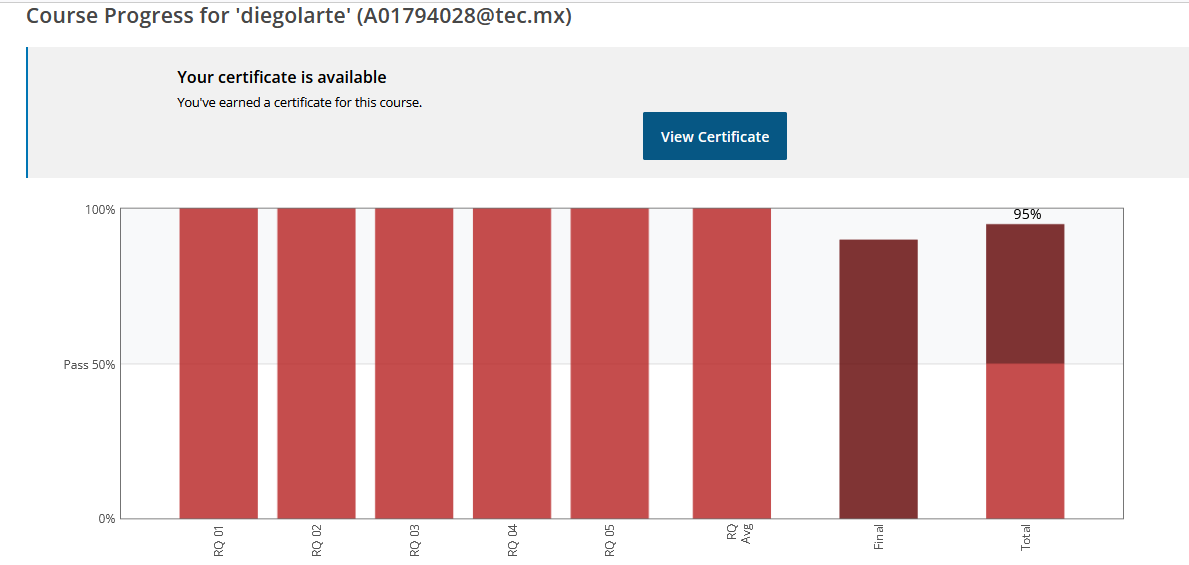